## BEER!
### Brent Jensen Capstone 2 project.  Springboard, 2019  Getting Started
"Whoever drinks BEER, he is quick to sleep; whoever sleeps long, does not sin; whoever does not sin, enters Heaven! Thus, let us drink BEER!" Martin Luther
### Why I search for beer:
This is my second project at Springboard, meant to apply supervised learning techniques to text data.  
As a lover of craft beer, I often check reviews on BeerAdvocate.com to inform my choice when buying beer.  So I set out to explore data at BeerAdvocate.com.  
I found a scraper (on github) that collected random reviews from the web site.  I modified the scraper to fit my needs.  Next, I collected data from BeerAdvocate:  beer __name, brewery, style, rating, and review__.  I collected 80,818 reviews.  Now it's time to explore the data.  

### Initial questions:
1. What beers are most reviewed?  (measure by style) 
2. What do reviews look like?  (what is the longest review, or shortest.  Are they orderly, with paragraphs and bullets?  How is the spelling?  
3. Do they use descriptive words?  Do they use long or short words?  What words are most common?  
4. What breweries are most reviewed?  How many beers does a typical brewery produce?   
5. Ratings: what's the distribution?  Average?  

![beer image](https://timedotcom.files.wordpress.com/2018/04/national-beer-day-ipa.jpg)
photo by David Prahl/EyeEm-GettyImages/EyeEm

In [30]:
# IMPORT MODULES AND THE DATA SET
import numpy as np
import pandas as pd

df = pd.read_csv('beer.csv', header=0)
pd.set_option('max_colwidth', 220)
print(df.shape)
df.head(8)

(80818, 5)


,name,brewery,style,rating,review
0,Big Rock Ale,Big Rock Brewery,Scottish Ale,3.90,"smell  soft hop aroma with significant malt scents. this one smells very creamy. taste  and creamy it is. the traditional irish flavors come out at the tongue. this is creamy, not like a cream ale, but close. the m..."
1,Flip Ale,Dogfish Head Craft Brewery,Old Ale,4.08,on tap at dfh rehoboth... collab with eatily... cardamom and red wine must. golden orange. .no head. typical dfh yeast aroma. ..some spice and maybe a belgian influence. sweet spicy and somewhat fruity.. not much ol...
2,The Almond Marzen Project - Beer Camp #26,Sierra Nevada Brewing Co.,Märzen / Oktoberfest,3.78,"nice auburn impressions, tons of clarity, solid inch of off white head. aroma was a little bit sweet and nutty. taste gave a little more sweetness, stayed away from hops and bitterness, relatively light bodied. no..."
3,Perpetual Burn IPA,Rock Bottom Restaurant & Brewery,American IPA,3.88,"s - piney, a little cat piss in a good way, skunky bud. t - some caramel front, tons of hops at the finish. m - medium body, a little too sharp and unbalanced for me. d - very sessionable considering the hops and abv."
4,Hop Monster DRIPA,Iron Hill Brewery & Restaurant,American Double / Imperial IPA,4.14,"double red ipa, full-bodied rich caramel malt character with a generous amount of american hops. beware the monster! a: this was a clear, amber tinted copper color. it was served to me with a firm, frothy cap. s: s..."
5,Season Of Perception,Tired Hands Brewing Company,American Double / Imperial Stout,4.25,"appearance: arrives coal black with a modest head that leaves a few splashes of lacing smell: chocolate, roast and coffee tones, with a nice hint of lemon taste: chocolate and roast forward, with a blast of coffe..."
6,Oktoberfest,Four Peaks Brewing Company - 8th Street Brewery,Märzen / Oktoberfest,3.72,"poured a nice amber/copper with a half-finger white head. it looks like a good oktoberfest, or even a vienna lager, as the brewery was calling it. scents of lager yeast, fresh bread and fruity esters. an excellent..."
7,Comet Dust,Equinox Brewing Company,American Pale Wheat Ale,3.00,


#### Each rating has name, brewery, style, rating (scale 1-5), and a review (text description.)  Some reviews are blank.  
#### The entries vary.  The names are evocative.  The review text varies.  Some are blank.  They are a bit sloppy, with lots of descriptive words, such as "cat piss" "coal black" "cardamom" "caramel."  

### 1. BEER STYLES:  
#### Look at how many beer reviews per style.  

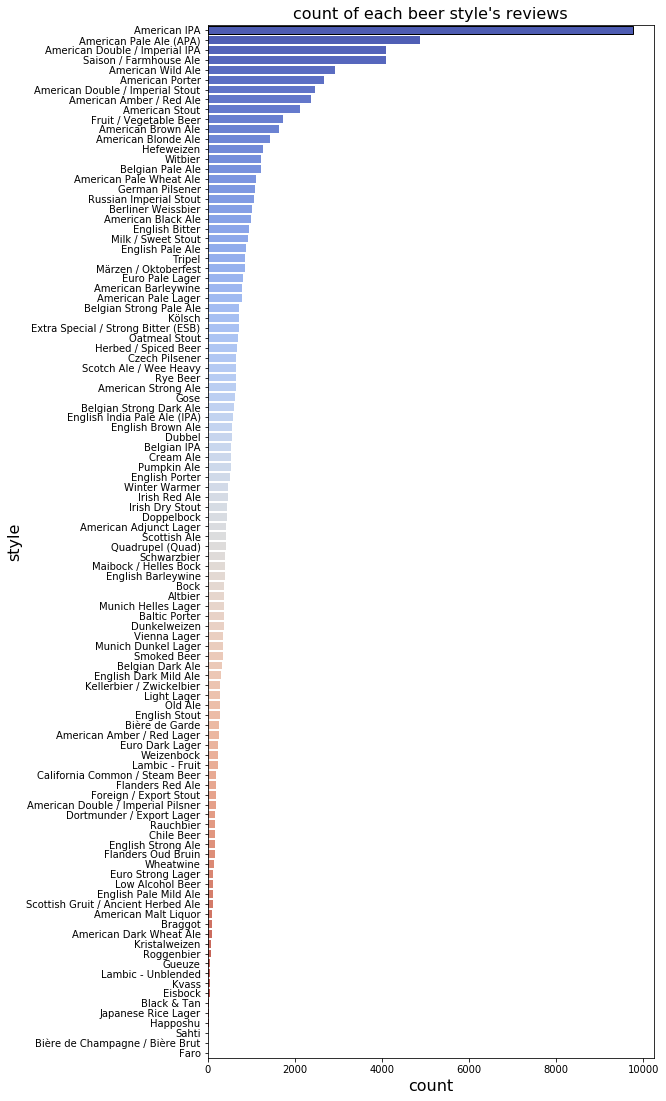

In [31]:
# group number of reviews for each style and plot on bar chart
import matplotlib.pyplot as plt
import seaborn as sns
styles = pd.DataFrame()
labels = df.groupby(['style']).size() 
styles['count'] = labels
styles['style'] = labels.index
styles = styles.sort_values(by='count', ascending=False)
fig, ax = plt.subplots()
fig.set_size_inches(8,19)
sns.barplot(x='count', y='style', data=styles, ax=ax, palette="coolwarm", edgecolor="k")
plt.title("count of each beer style's reviews", size=16)
plt.ylabel('style', size=16)
plt.xlabel('count', size=16)
plt.show()

#### American IPA is well reviewed: 9758 reviews out of 80,818.  Wow, BeerAdvocate users love their IPAs.  
#### Some styles have very few reviews.  I may have too little data to evaluate the least reviewed styles.  Why does "Faro" get no love?  More importantly, there are some great styles with few reviews, such as Gueuze, Lambic, English Pale Mild Ale (a poor name for a great beer style), English Barleywine, etc.  
#### This data set will be imbalanced, so I may want to combine some styles.  (American IPA and English IPA, for instance.)

### 2. REVIEW APPEARANCE:   
#### What do reviews look like? (what is the longest review, or shortest. Are they orderly, with paragraphs and bullets?  How is the spelling? Do they use long or short words? (histograms)

In [32]:
# look at review 1
df.review[1]

' on tap at dfh rehoboth... collab with eatily... cardamom and red wine must. golden orange. .no head. typical dfh yeast aroma. ..some spice and maybe a belgian influence. sweet spicy and somewhat fruity.. not much old ale characteristic. too light for that. its still tasty. the cardamom does add some nice flavor but not its still kind if lacking in complexity. good not great.  '

#### The review has poor sentence structure, some gibberish, and good descriptive words.

In [33]:
df.review[7]

' '

#### Review 7 has one blank character.  Further analysis shows that many reviews have one blank character.  This may be the default for no review entered.  Let's count them:  

  blank reviews: 17,624
verbose reviews: 63,194
  total reviews: 80,818
blank reviews are 21.81% out of 80818 observations


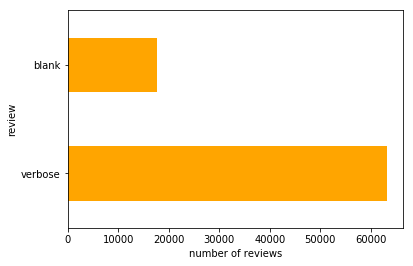

In [34]:
#count the blank reviews and the non-blank (verbose) reviews
b = df.groupby([df['review']==' ']).size()
print('  blank reviews:', format(b[1], ',d'))
print('verbose reviews:', format(b[0], ',d'))
print('  total reviews:', format(len(df), ',d'))
print("blank reviews are {:.2f}% out of {} observations".format(100* b[1]/(b[1]+b[0]), b[1]+b[0]))
_= b.plot(kind='barh', color='orange')
_= plt.xlabel('number of reviews')
_= plt.yticks([True,False],['blank','verbose']) #rename ticks from booleans to 'blank','verbose'
plt.show()

#### These reviews won't be usable for any text analysis.  Over 60,000 reviews remain with at least one character entered.  How many characters?  Let's make histograms of review length (by number of characters.)  There are many short or blank reviews, so I separated into 2 histograms: first short reviews, then long reviews.  

In [35]:
# review length distribution.  Add a column that measures length of 'review'  
df['review_length'] = df['review'].str.len()
print('1 char reviews: ',sum(df['review_length']==1))
print('2 char reviews: ',sum(df['review_length']==2))
print('3 char reviews: ',sum(df['review_length']==3))
print('4 char reviews: ',sum(df['review_length']==4))
print('shortest review: ',min(df.review_length), 'chars long.')
print('longest review: ',max(df.review_length), 'chars long.')

1 char reviews:  17624
2 char reviews:  7625
3 char reviews:  2468
4 char reviews:  1428
shortest review:  1 chars long.
longest review:  22085 chars long.


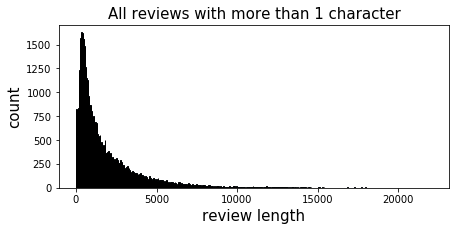

In [36]:
bins3= np.arange(2,22085,50)  
_= plt.figure(figsize=(7,3))
_= plt.hist(df['review_length'], bins=bins2, edgecolor="k")
_= plt.title('All reviews with more than 1 character', size=15)
_= plt.xlabel('review length', size=15)
_= plt.ylabel('count', size=15)
plt.show()

#### I have a feeling that most short reviews won't have useful information.  Let's look at reviews with < 20 chars

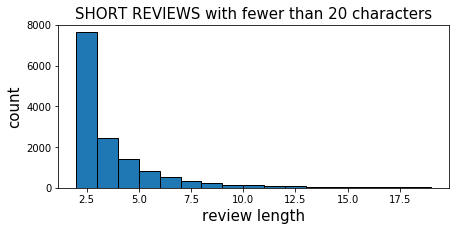

In [37]:
bins= np.arange(2,20,1)  
_= plt.figure(figsize=(7,3))
_= plt.hist(df['review_length'], bins=bins, edgecolor="k")
_= plt.title('SHORT REVIEWS with fewer than 20 characters', size=15)
_= plt.xlabel('review length', size=15)
_= plt.ylabel('count', size=15)
plt.show()

In [41]:
# print the shortest reviews, with > 1 char and < 20 chars
# combine all the text into one file 'full', and print it.

short_reviews = df[df['review'].str.len()<20]
short_reviews = short_reviews[short_reviews['review'].str.len()>1]
print(len(short_reviews))
print(type(short_reviews))
full = ''
for r in short_reviews['review']:
    full = full + r
print(full[:8000])  # just print short reviews from the first 8000 in the data

14035
<class 'pandas.core.frame.DataFrame'>
                                                                                                                                                                                                                                                                                  4/4.25/4.25/4/4.25                                                                                                                                                                                                                                                                                                                                                                                   eric                                                                                                                 nice                                                                                                                                                                            

#### There is very little useful information in these 14,035 reviews.  The reviewers gave a score, but little or no explanation.  

### 3. WORDS:    
#### Explore words.  Start with length of words per review.  Do some reviewers like long words?  short words?  

In [42]:
# explore word length per review:
# function to count average word length in a review: 
def avg_word_len(words):
    separate_words = words.split()
    count_words = (len(separate_words))    # number of words
    if count_words> 0:
        characters = len(words)  # length of text
        avg = (characters - count_words+1)/count_words
    else:
        avg = 5.6  # this is the mean of the verbose reviews    
    return avg   

df['avg_word_length'] = df['review'].apply(avg_word_len)

mean word length: 5.111259417069375
standard deviation: 0.6606600801236275
review with shortest words: 2.0
review with longest words: 30.0
reviews avg word < 4.1: 679
reviews avg word > 5.7: 1074


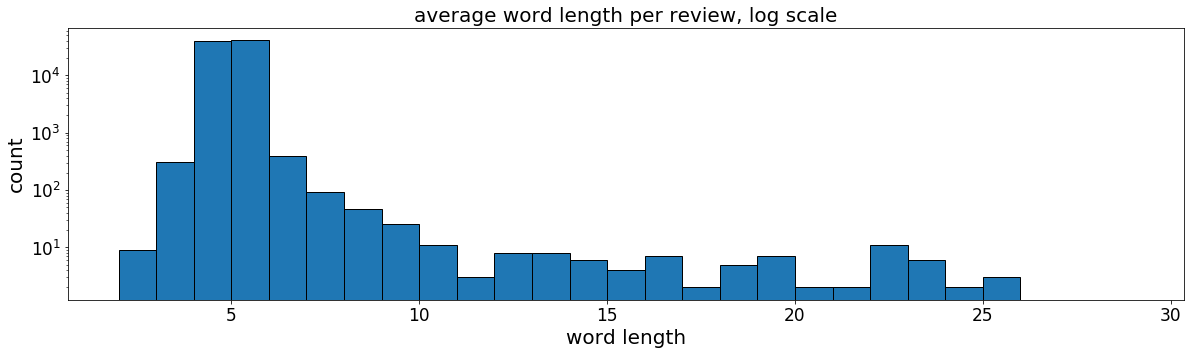

In [43]:
# histogram of average word length

print('mean word length:', np.mean(df['avg_word_length']))
print('standard deviation:', np.std(df['avg_word_length']))
print('review with shortest words:', np.min(df.avg_word_length))
print('review with longest words:', np.max(df.avg_word_length))
print('reviews avg word < 4.1:', sum(df.avg_word_length<4.1))
print('reviews avg word > 5.7:', sum(df.avg_word_length>5.7))

bins= np.arange(2,30,1)  
_= plt.figure(figsize=(20,5))
_= plt.yscale('log', nonposy='clip')
_= plt.hist(df['avg_word_length'], bins=bins, edgecolor="k")
_= plt.xticks(size=17)
_= plt.yticks(size=17)
_= plt.title('average word length per review, log scale', size=20)
_= plt.xlabel('word length', size=20)
_= plt.ylabel('count', size=20)
plt.show()

####  most reviews use short words, average length is between 4 and 6 chars per word.  But a few reviews have very long words.  This is curious.  Let's look at all reviews with > 19 chars:

In [44]:
# longest average word length 30 characters!  Look at such reviews.  
long_word_df = df[df['avg_word_length']>19]
print(len(long_word_df))
print(long_word_df['review'])

28
2781                4/3.5/3.5/3.75/3.5 
6128           3.25/3.25/3.25/3.5/3.25 
13383            3.75/4/3.75/3.75/3.75 
16762          2.75/3.25/3.5/3.25/3.25 
23377           4/3.25/3.25/3.75/3.25  
23569            3.75/3.5/3.5/3.75/3.5 
24993               10-24              
25884            3.75/3.5/3.75/3.5/3.5 
27239            3.25/3.5/3.5/3.25/3.5 
37783           3.75/2.5/2.25/2.75/2.5 
40034           3.5/3.25/3.25/3.5/3.25 
41742             4/4.25/4.5/4.25/4.25 
42177           4/3.25/3.25/3.75/3.25  
43770            3.75/3.5/3.5/3.75/3.5 
47856            3.75/3.5/3.5/3.75/3.5 
52025          3.75/3.5/3.25/3.5/3.25  
54241               10-24              
58369            3.75/4/3.75/3.75/3.75 
58426             3.5/3.5/3.5/3.75/3.5 
59559           3.75/3.5/3.5/3.75/3.5  
61241            4.25/3.75/3.5/3.5/3.5 
62059          3.25/3.25/3.25/3.5/3.25 
65415            3.75/3.5/3.5/3.75/3.5 
66865            3.75/3.5/3.5/3.75/3.5 
67457            3.75/3.75/4.35/4/3.7

#### Reviews with very long avg word length do not include useful text.  (they contain a ratings scale of aroma, appearance, flavor, mouthfeel, and overall.)  If I plan to examine text, these reviews might not be useful.  Perhaps I should eliminate very long reviews.  Or perhaps I should eliminate numbers and punctuation.  Either way, the above would be gone.

### 3. WORDS continued  
#### what words are common?  Convert reviews to "bag of words"  Remove capitals and non-letters

In [45]:
# Change review to a string of words.  remove non-letters, make lower case, split into words.  
# Remove stopwords (common words.)  Join back together into a long string of words. 
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
def review_to_words(review):
    letters_only = re.sub('[^a-zA-Z]',' ', review)
    words = letters_only.lower().split()
    stops = set(stopwords.words('english'))  
    good_words = [w for w in words if not w in stops]
    porter = PorterStemmer()
    stemmed = [porter.stem(word) for word in good_words]
    return(' '.join(good_words))

# clean the reviews
df['clean_review'] = df['review'].apply(review_to_words)  

In [46]:
# check word length again, see if it changed (it was 4.93)
df['review_length'] = df['clean_review'].apply(len)

# average word length
def avg_word_len(words):
    separate_words = words.split()
    count_words = (len(separate_words))    # number of words
    if count_words> 0:
        characters = len(words)  # length of text
        avg = (characters - count_words+1)/count_words
    else:
        avg = 5.65  # this is the mean of 49000 reviews    
    return avg   

print('number of characters per review')
print('mean:',df['review_length'].mean())
print('max: ',df['review_length'].max())
print('min: ',df['review_length'].min())
print('')
print('word length per review')
df['avg_word_length'] = df['clean_review'].apply(avg_word_len)
print('mean:',df['avg_word_length'].mean())
print('max: ',df['avg_word_length'].max())
print('min: ',df['avg_word_length'].min())

number of characters per review
mean: 803.5154915984062
max:  14369
min:  0

word length per review
mean: 5.669480359625356
max:  13.0
min:  1.0


#### by removing very short reviews, and by removing numbers and characters, the avg word length went up to 5.67

#### What words are most common in the reviews?  

In [57]:
from collections import Counter
how_many = 40
word_count = Counter(" ".join(df['clean_review']).split()).most_common(how_many)
sorted(word_count)
print(word_count)

[('beer', 145524), ('head', 119439), ('light', 103267), ('taste', 94320), ('malt', 82319), ('nice', 80718), ('good', 78322), ('like', 75384), ('sweet', 71317), ('carbonation', 68903), ('hops', 67137), ('medium', 63726), ('aroma', 62816), ('bit', 61047), ('body', 58450), ('one', 57407), ('white', 57115), ('dark', 57107), ('finish', 56241), ('flavor', 55894), ('little', 53048), ('well', 53003), ('notes', 48459), ('color', 47202), ('pours', 44737), ('glass', 44474), ('hop', 44160), ('caramel', 42297), ('brown', 41374), ('lacing', 41290), ('smell', 40979), ('overall', 40883), ('mouthfeel', 40410), ('bitterness', 39605), ('nose', 39407), ('really', 39345), ('citrus', 38264), ('bottle', 38264), ('much', 35621), ('chocolate', 35436)]


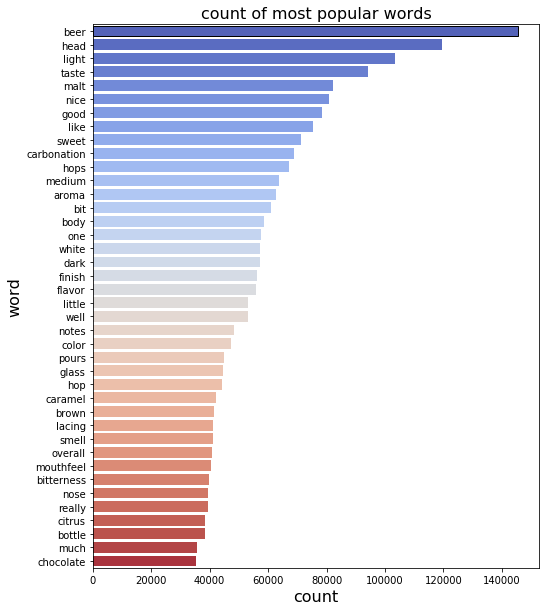

In [65]:
# plot words on bar chart
import matplotlib.pyplot as plt
import seaborn as sns

labels, values = zip(*word_count)
words = pd.DataFrame()
words['count'] = values
words['word'] = labels
words = words.sort_values(by='count', ascending=False)
fig, ax = plt.subplots()
fig.set_size_inches(8,10)
sns.barplot(x='count', y='word', data=words, ax=ax, palette="coolwarm", edgecolor="k")
plt.title("count of most popular words", size=16)
plt.ylabel('word', size=16)
plt.xlabel('count', size=16)
plt.show()

#### These words are beer words, for sure.  I'm not surprised at this list.  Most are neutral, some positive.  I don't see any negative words here.  

### 4. BREWERIES
#### count number of reviews from each brewery

In [66]:
# examine distribution of breweries

breweries = df.brewery.value_counts()
print('number of breweries reviewed:',len(breweries))
print('breweries with only 1 review:',sum(breweries==1))
print('breweries with 2 or 3 reviews:', sum(breweries==2)+sum(breweries==3))
print('')
print('THE MOST REVIEWED BREWERIES:')
print(breweries[breweries>100])

number of breweries reviewed: 10817
breweries with only 1 review: 2612
breweries with 2 or 3 reviews: 2919

THE MOST REVIEWED BREWERIES:
Rock Bottom Restaurant & Brewery                   391
Tired Hands Brewing Company                        320
Cigar City Brewing                                 289
Goose Island Beer Co.                              235
Iron Hill Brewery & Restaurant                     228
Mikkeller ApS                                      221
The Bruery                                         185
Pizza Port Solana Beach                            183
Stone Brewing                                      180
Imperial Oak Brewing                               172
Sierra Nevada Brewing Co.                          165
Minneapolis Town Hall Brewery                      155
Wicked Weed Brewing                                139
Captain Lawrence Brewing Co.                       138
Al's of Hampden / Pizza Boy Brewing                137
Founders Brewing Company              

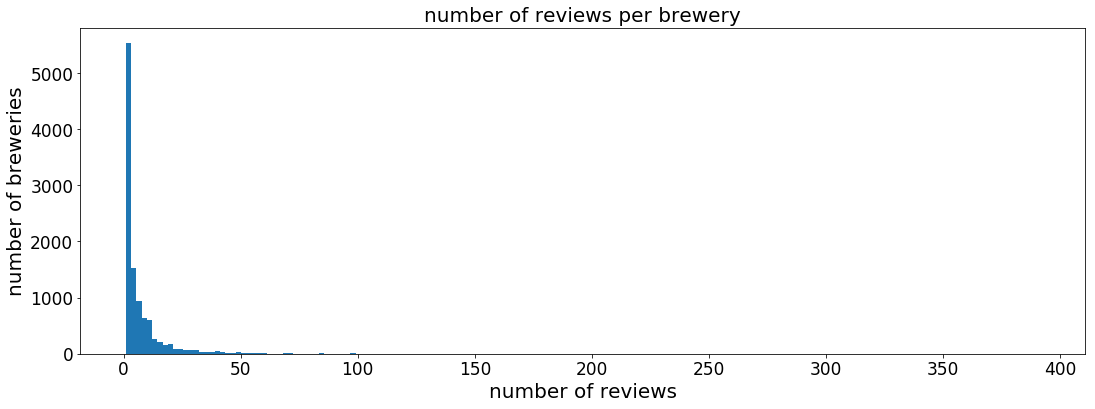

In [67]:
#_= breweries.hist(bins=175)
_= plt.figure(figsize=(18,6))
_= plt.hist(breweries, bins=175)
_= plt.xticks(size=17)
_= plt.yticks(size=17)
_= plt.title('number of reviews per brewery', size=20)
_= plt.xlabel('number of reviews', size=20)
_= plt.ylabel('number of breweries', size=20)
plt.show()

#### The breweries with the most reviews are not familiar.  Rock Bottom, Tired Hands, and Cigar City?  
#### Among these obscure brands, I do see some well known brands: Sierra Nevada, Goose Island, Stone, Founders, Deschutes, and Dogfish Head.  
#### I wonder why some breweries have so many reviews, and others so few?  Why are the top 3 most rated breweries unknown to me?  The histogram shows that most breweries have few reviews (5,500 breweries have 1, 2 or 3 reviews.)  

### 5. RATINGS 
#### show distribution.  Beers are rated on a scale of 1 to 5. Ratings are averaged, so a rating can be anywhere in between.  Check that no ratings exist over 5 or less than 1.  Plot a chart to see its shape.

In [68]:
meanrating= df.rating.mean()
print('mean rating: {:.2f}'.format(meanrating))
SDrating= df.rating.std()
print('standard deviation: {:.4f}'.format(SDrating))
print('median rating:', df.rating.median())
print('lowest rating:', df.rating.min())
print('highest rating:', df.rating.max())

mean rating: 3.73
standard deviation: 0.4588
median rating: 3.79
lowest rating: 1.0
highest rating: 5.0


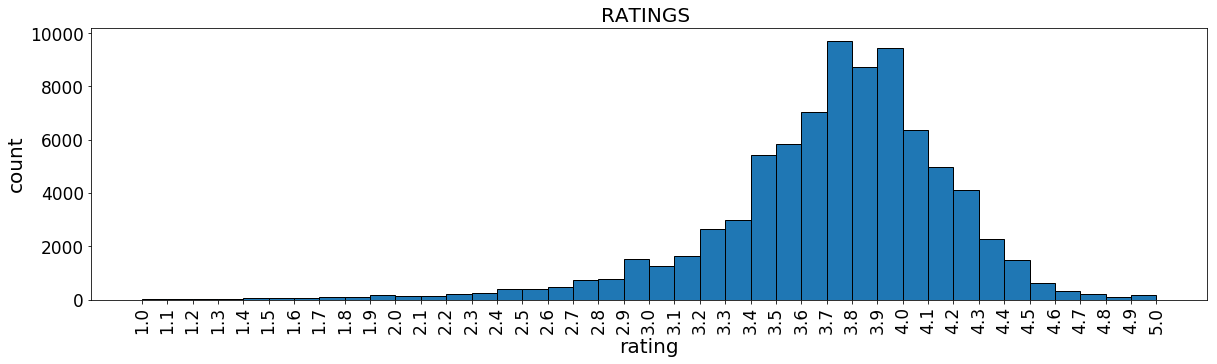

mean rating: 3.73
standard deviation: 0.4588
median rating: 3.79


In [69]:
# ratings distribution.  
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import seaborn as sns

bins= np.arange(1,5.1,0.1)   # bins from 1 to 5, increments of 0.1
_= plt.figure(figsize=(20,5))
_= plt.hist(df['rating'], bins=bins, edgecolor="k") 
_= plt.xticks(bins, rotation='vertical',size=17)
_= plt.yticks(size=17)
_= plt.title('RATINGS ', size=20)
_= plt.xlabel('rating', size=20)
_= plt.ylabel('count', size=20)
plt.show()

meanrating= df.rating.mean()
print('mean rating: {:.2f}'.format(meanrating))
SDrating= df.rating.std()
print('standard deviation: {:.4f}'.format(SDrating))
print('median rating:', df.rating.median())

#### This histogram is normal, with a long left tail.  No surprise.  No outliers.  I wonder, what beers rated 5.0 or 1.0?  What styles got the highest or lowest ratings?  

In [70]:
print ('lowest rating', df.rating.min())
print ('beers with a 1 rating: ', sum(df['rating'] == 1))
print ('beers with < 1.2 rating: ', sum(df['rating'] < 1.2))
print ('---')
print ('highest rating', df.rating.max())
print ('beers with a 5 rating: ', sum(df['rating'] == 5))
print ('beers with > 4.8 rating: ', sum(df['rating'] > 4.8))

lowest rating 1.0
beers with a 1 rating:  24
beers with < 1.2 rating:  57
---
highest rating 5.0
beers with a 5 rating:  113
beers with > 4.8 rating:  233


In [76]:
# look at the review text for all the lowest rated beers.
lowest_rated_df = df[df['rating'] == 1] 
print ('number of beers with a 1 rating: ', len(lowest_rated_df))
print (lowest_rated_df['review'])  

number of beers with a 1 rating:  24
3042                                                                                                                                                                                                                                
3818                                                                                                                                                                                            - available at condis supermarkets- 
11578                                                                                                                                                                                                                               
13274                                                                                                                                                                                                                               
14175                                          

#### These reviews are mostly blank!  That's a surprise.  I wish I could read the reviewers' thoughts, but I suppose a 1 rating says it all.  

In [80]:
# look at the review text for some of the highest rated beers.
highest_rated_df = df[df['rating'] == 5] 
print ('number of beers with a 5 rating: ', len(highest_rated_df))
print (highest_rated_df['review'][:25])  # just print the first 25

number of beers with a 5 rating:  113
2221                                                                                                                                                                                                                                
2258                                                                                                                                                                                                                                
2334                                                                                                                                                                                                                                
2856                                                                                                                                                                                                                                
3155                                          

#### These reviews are also less wordy than average reviews.  
#### Now let's look at the styles that got the highest ratings.  I will include beers rated > 4.5, so we have a lot to look at.  

number of beers with >4.5 rating:  1349


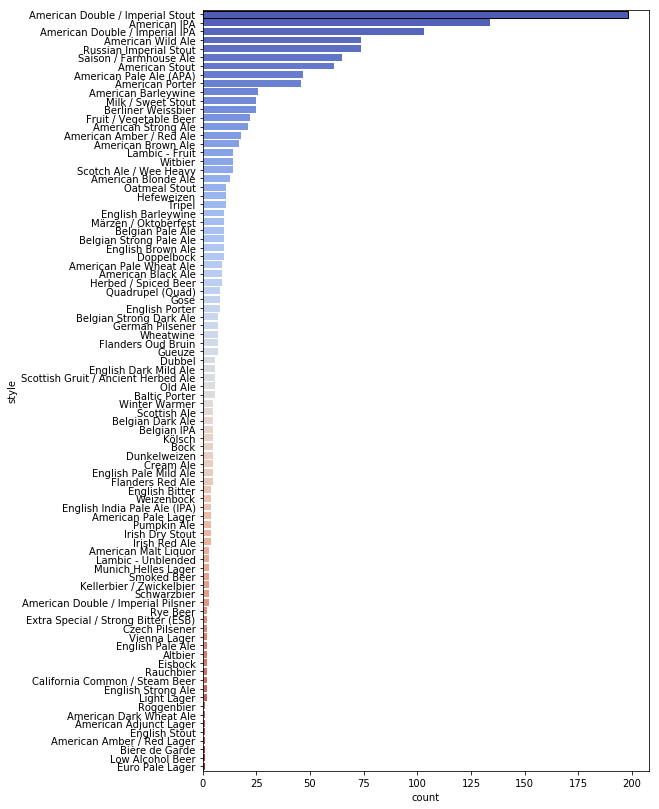

In [87]:
high_rated_df = df[df['rating'] > 4.5]
print ('number of beers with >4.5 rating: ', len(high_rated_df))
high_styles = pd.DataFrame()
labels = high_rated_df.groupby(['style']).size()
high_styles['count'] = labels
high_styles['style'] = labels.index
high_styles = high_styles.sort_values(by='count', ascending=False)
fig, ax = plt.subplots()
fig.set_size_inches(8,14)
sns.barplot(x='count', y='style', data=high_styles, ax=ax, palette="coolwarm", edgecolor='k')
plt.ylabel('style')
plt.xlabel('count')
plt.show()

#### Styles with high ratings:
#### Wow!  This chart resembles an earlier chart, but the beers are in a different order!  This chart shows how many high ratings each style got.  IPAs are well represented, but not rated the highest.  They are a notch lower than in the graph showing number of overall reviews.  The most loved beers include "Amer Double/Imper Stout", "Russian Stout", "Milk Stout", "American Barleywine":, and "Lambic".  At the bottom of the list is "Euro Pale Lager", a beer that had so many ratings overall it was 26th out of 104!  It is more popular than its rating?  




#### GETTING STARTED
#### This initial look confirmed some assumptions, but also revealed a few surprises!  
#### The ratings distribution were as I expected, a normal curve.  Some beers were more popular than others, both in ratings, and in number of reviews.  IPA is more popular than I knew; I was surprised at how many IPA ratings exist, and its rating is among the highest.  But some beers that are sampled less often may rate higher.  
#### Many beers were rated with no written review.  I expected more reviews.  Most reviews are a jumble of descriptive words.  Some reviews are gobblygook, or numbers.  Some breweries have hundreds of ratings!  Most breweries have few ratings.  

#### NEXT STEPS (further questions.)
#### Do a beer review's words correlate with the beer's score and style?  I could use machine learning to see if I can predict style and rating from the review.  